In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv(r"F:\01. TOOLS\06. DATASETS\DS\loan-train.csv")
df2=pd.read_csv(r"F:\01. TOOLS\06. DATASETS\DS\loan-test.csv")

# Exploratory Data Analysis (EDA)

In [3]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


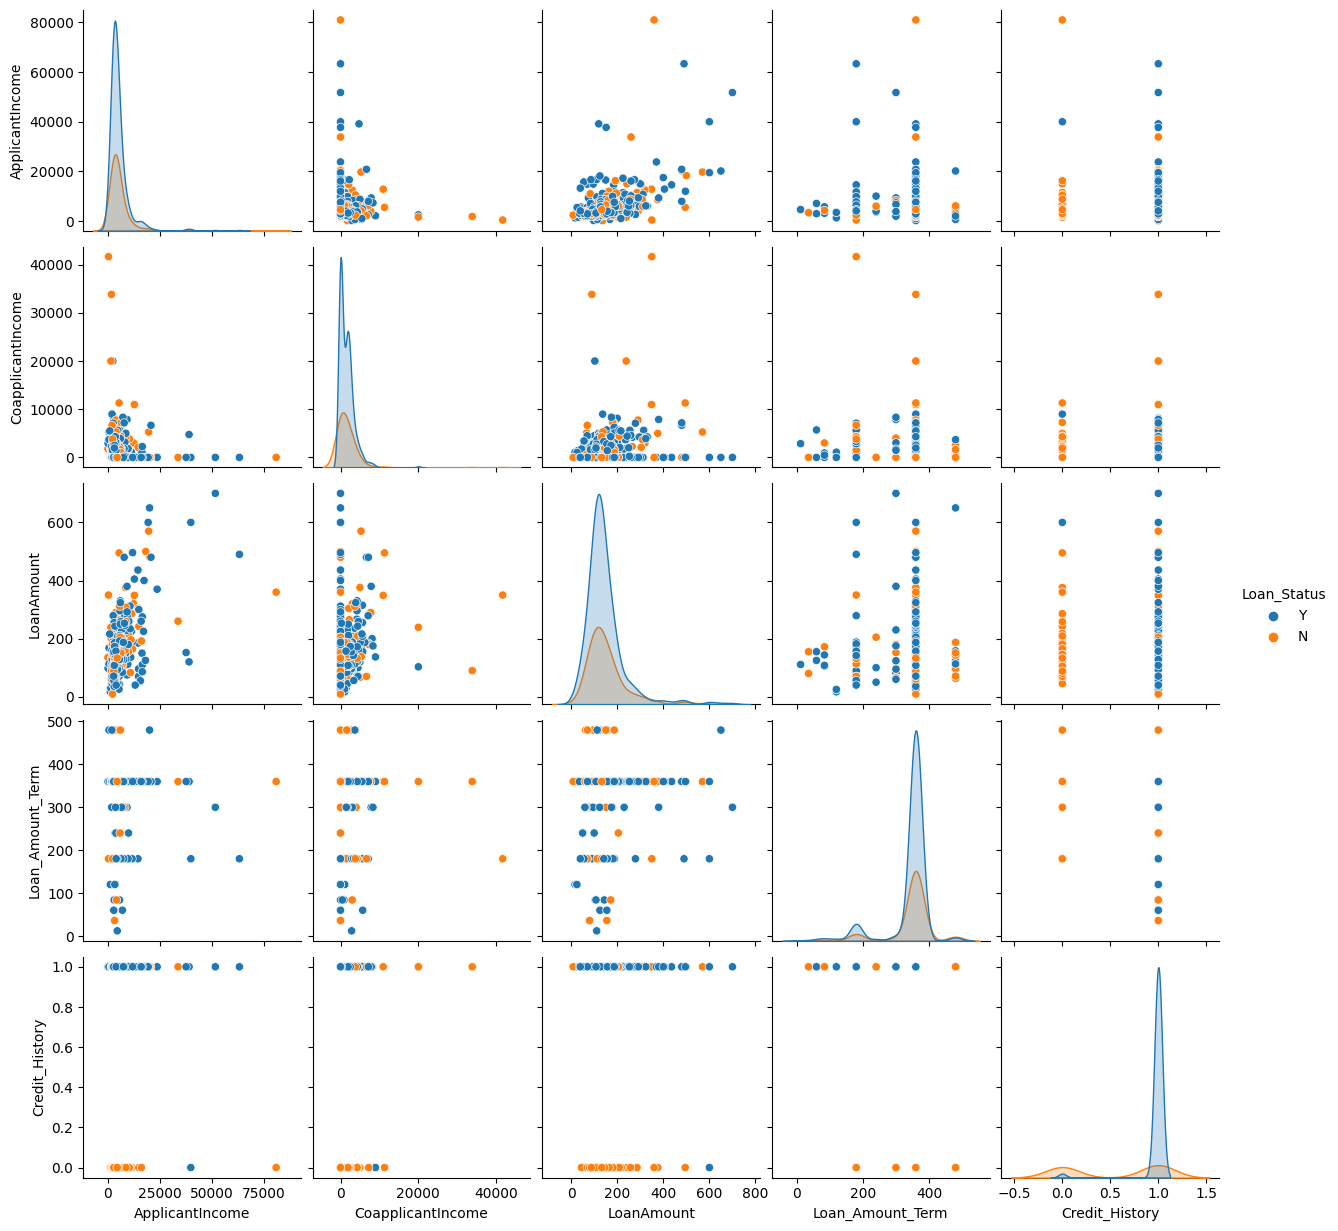

In [5]:
sns.pairplot(df1, hue = 'Loan_Status')

(array([422.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 192.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

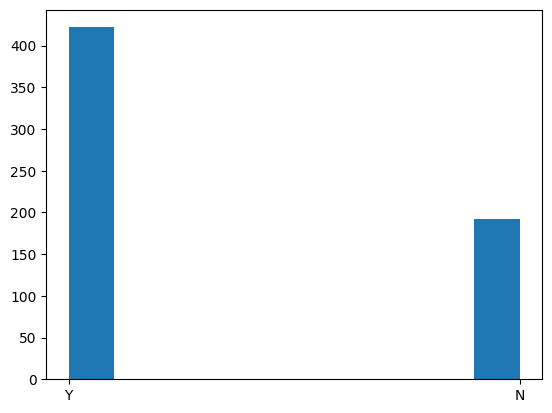

In [6]:
plt.hist(df1['Loan_Status'])

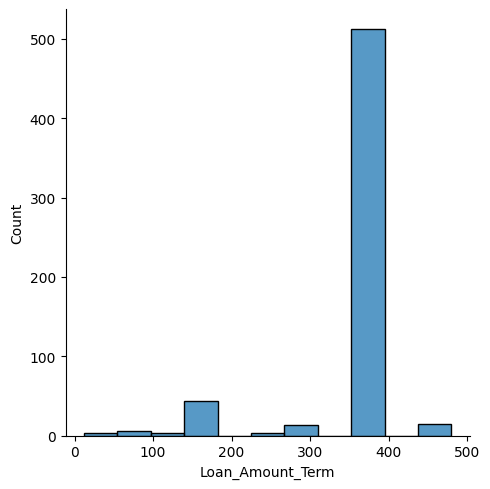

In [7]:
sns.displot(df1['Loan_Amount_Term'])

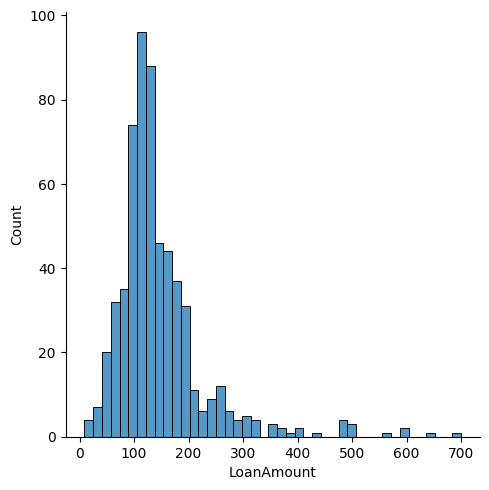

In [8]:
sns.displot(df1['LoanAmount'])

<AxesSubplot: xlabel='Education', ylabel='ApplicantIncome'>

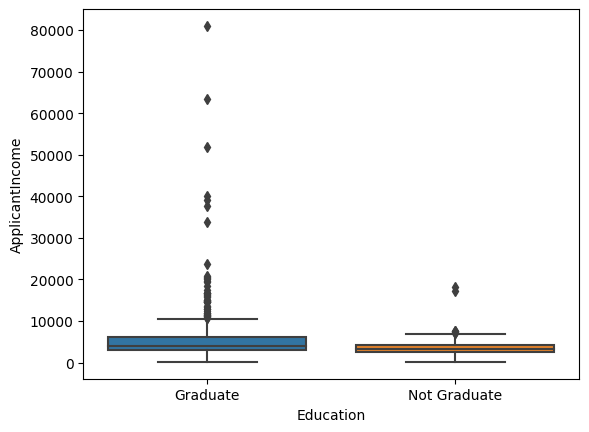

In [9]:
sns.boxplot(x='Education',y='ApplicantIncome',data=df1)

## Data preprocessing:

In [10]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling Categorical Data

In [11]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
df1['Loan_Status'] = df1['Loan_Status'].fillna(df1['Loan_Status'].mode()[0])

### Filling Numerical Data

In [12]:
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mean())
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean())
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mean())

df1['LoanAmount_log']=np.log(df1['LoanAmount'])
df1['TotalIncome']= df1['ApplicantIncome'] +df1['CoapplicantIncome']
df1['TotalIncome_log']=np.log(df1['TotalIncome'])


In [13]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [14]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


## Modeling:

In [15]:
from sklearn.preprocessing import LabelEncoder
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 
le = LabelEncoder()
for i in category:
    df1[i] = le.fit_transform(df1[i]) 

In [16]:
df1.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368


### Splitting Data

In [17]:
X = df1.iloc[:, 1:12].values
Y = df1.iloc[:, 12].values

In [18]:
X

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [19]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state= 42, test_size = 0.30)

In [21]:
X_test.shape

(185, 11)

In [22]:
X_train.shape

(429, 11)

# Testing Data on different models:

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [24]:
# Predicting the test set value

y_pred = lr.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [25]:
from sklearn import metrics

#print('The accuracy score for Logistic Regression is: ', metrics.accuracy_score(y_pred, Y_test, normalize= True))
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, Y_test))

The accuracy of Logistic Regression is:  0.7891891891891892


### Decision Tree

In [26]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [27]:
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

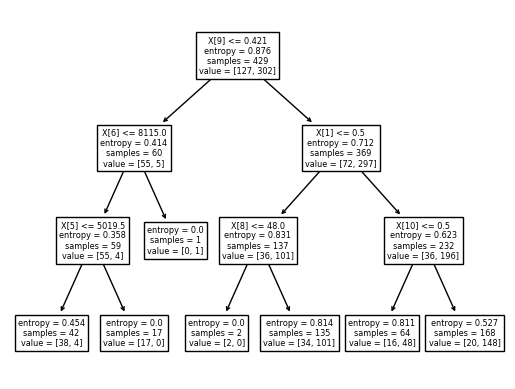

In [28]:
#PLot the decision tree
tree.plot_tree(dt);

In [29]:
#Predicting on test data
preds = dt.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    157
0     28
dtype: int64

In [30]:
#Find the accuracy
print('The accuracy of Decision Tree Classifier is: ', dt.score(X_test,Y_test))

The accuracy of Decision Tree Classifier is:  0.7783783783783784


### Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, criterion='squared_error',max_depth=5,min_samples_split=4,
min_samples_leaf=3)

#n_estimators mean n forests

In [32]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4,
                      n_estimators=200)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

predicted=rf.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, predicted))
print("R Square score: %.2f" % r2_score(Y_test, predicted))

Mean squared error: 0.16
R Square score: 0.30


##### We’ve gone through the loan data and followed through the steps namely EDA , preprocessing and modeling and we’ve used essential classification models such as Logistic regression , Decision tree and Random forests.
##### After fitting the data on different model, we can conclude that Logistic Regression is the best fitted model for this dataset, based on the Accuracy score i.e., 0.7891891891891892 (or) ~79% accuracy, when compard to the other models.

# Training the Model ( Logistic Regression)

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [35]:
y_pred = lr.predict(X_test)

y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[ 28,  37],
       [  2, 118]], dtype=int64)

In [37]:
tn,fp,fn,tp = confusion_matrix(Y_test,y_pred).ravel()
tn,fp,fn,tp

(28, 37, 2, 118)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        65
           1       0.76      0.98      0.86       120

    accuracy                           0.79       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.79      0.76       185



In [39]:
Accuracy = (tp+tn) / (tp+tn+fp+fn)
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

print('Accuracy of Logistic Regression Model:  ', Accuracy)
print('Specificity of Logistic Regression Model: ', specificity)
print('Sensitivity of Logistic Regression Model: ', sensitivity)

Accuracy of Logistic Regression Model:   0.7891891891891892
Specificity of Logistic Regression Model:  0.4307692307692308
Sensitivity of Logistic Regression Model:  0.9833333333333333


In [40]:
lr = LogisticRegression()
lr.fit(X_train,Y_train.ravel())

y_pred = lr.predict(X_test)
y_pred

y_pred_train = lr.predict(X_train)
y_pred_train

y_prob_train = lr.predict_proba(X_train)[:,1]
y_prob_train.reshape(1,-1)

y_prob = lr.predict_proba(X_test)[:,1]
y_prob.reshape(1,-1)

array([[0.81875901, 0.77707199, 0.85389452, 0.81772937, 0.77962389,
        0.85877425, 0.8536228 , 0.8425425 , 0.80866694, 0.82678006,
        0.27095496, 0.84635519, 0.74300433, 0.80817339, 0.82835437,
        0.78568118, 0.76361789, 0.73085988, 0.83950096, 0.91503398,
        0.82433732, 0.81278142, 0.77532962, 0.83151479, 0.77401473,
        0.73527505, 0.80548327, 0.76520764, 0.86198935, 0.93165596,
        0.84572354, 0.84900125, 0.79148522, 0.73121761, 0.76128636,
        0.18534127, 0.8089209 , 0.83866418, 0.85365375, 0.84399051,
        0.73880554, 0.76899142, 0.84846211, 0.85455651, 0.74843815,
        0.80407243, 0.72263924, 0.22379028, 0.25281979, 0.18646458,
        0.57195196, 0.7549309 , 0.16963899, 0.75403777, 0.80729662,
        0.82536969, 0.69804417, 0.80571593, 0.2599354 , 0.83482945,
        0.19157663, 0.75973793, 0.26874958, 0.82357097, 0.83508429,
        0.75748863, 0.78563859, 0.82444885, 0.84522963, 0.76492708,
        0.14100645, 0.83417678, 0.79776614, 0.84

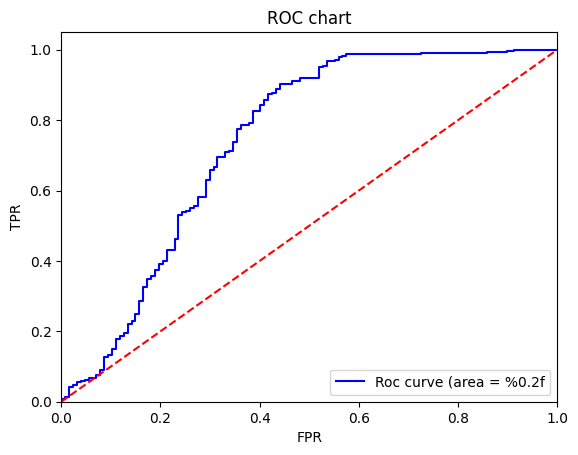

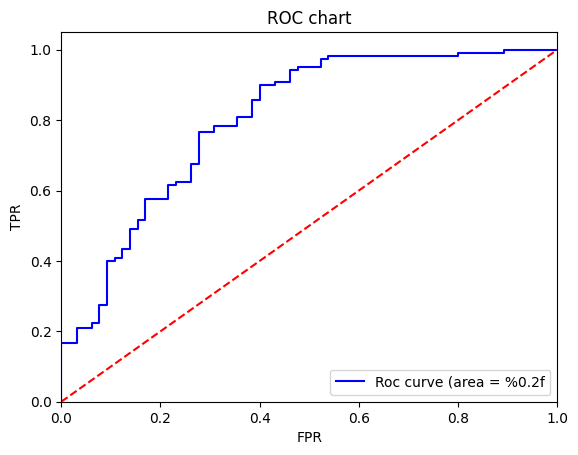

In [41]:
# train data

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_roc_auc = roc_auc_score(Y_train,y_pred_train)
fpr1,tpr1,thresold1 = roc_curve(Y_train,y_prob_train)

plt.figure()
plt.plot(fpr1,tpr1,color='blue',label = "Roc curve (area = %0.2f")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC chart')
plt.legend(loc="lower right")
plt.show()

# test data

log_roc_auc = roc_auc_score(Y_test,y_pred)
fpr,tpr,thresold = roc_curve(Y_test,y_prob)

plt.figure()
plt.plot(fpr,tpr,color='blue',label = "Roc curve (area = %0.2f")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC chart')
plt.legend(loc="lower right")
plt.show()

In [42]:
from sklearn.preprocessing import binarize
y_predict_class1 = binarize(y_prob.reshape(1,-1),threshold=0.3)[0]

y_predict_class = y_predict_class1.astype(int)
confusion_matrix2 = confusion_matrix(Y_test,y_predict_class)
# classification_report(y_test,y_predict_class)
confusion_matrix2

array([[ 27,  38],
       [  2, 118]], dtype=int64)